# Description

Data for the current project were downloaded from :

https://www.kaggle.com/datasets/evangower/chocolate-bar-ratings

I am grateful to Evan Gower for compiling this amazing and sweet dataset, check his kaggle.
https://www.kaggle.com/evangower


The chocolate bars dataser contains data about various manufacturers of chocolate bars across the world, the cocoa_percent contained in the bars they manufacture, the various ingredients used, the country of origin of the cocoa beans used and the overall rating of their product.  The dataset is focused on plain dark chocolate 

In [97]:
library(tidyverse)
options(digits=4)
options(warn=-1) #generally not recommended, i put that option after making sure everything is running ok.

In [5]:
df=read.csv("chocolate_bars.csv")

In [29]:
summary(df)

       id       manufacturer       company_location   year_reviewed 
 Min.   :   5   Length:2530        Length:2530        Min.   :2006  
 1st Qu.: 802   Class :character   Class :character   1st Qu.:2012  
 Median :1454   Mode  :character   Mode  :character   Median :2015  
 Mean   :1430                                         Mean   :2014  
 3rd Qu.:2079                                         3rd Qu.:2018  
 Max.   :2712                                         Max.   :2021  
                                                                    
 bean_origin          bar_name         cocoa_percent    num_ingredients
 Length:2530        Length:2530        Min.   : 42.00   Min.   :1.000  
 Class :character   Class :character   1st Qu.: 70.00   1st Qu.:2.000  
 Mode  :character   Mode  :character   Median : 70.00   Median :3.000  
                                       Mean   : 71.64   Mean   :3.041  
                                       3rd Qu.: 74.00   3rd Qu.:4.000  
                

In [30]:
df %>% mutate_all(is.na) %>% colSums

id     manufacturer company_location    year_reviewed 
               0                0                0                0 
     bean_origin         bar_name    cocoa_percent  num_ingredients 
               0                0                0               87 
     ingredients           review           rating 
               0                0                0

Our dataset is fairly clean. Only the num_ingredients column contains NA's

In [15]:
df %>% count(company_location) %>% arrange(desc(n))  %>% head()

,company_location,n
,<chr>,<int>
1,U.S.A.,1136
2,Canada,177
3,France,176
4,U.K.,133
5,Italy,78
6,Belgium,63


In [18]:
(df %>% count(company_location) %>% arrange(desc(n))  %>% slice(1))/2

ERROR: Error in FUN(left, right): non-numeric argument to binary operator


As we can see most companies are located in the U.S.A. Lets see where most companies get their beans from

In [22]:
df %>% count(bean_origin) %>% arrange(desc(n))  %>% head(10)

,bean_origin,n
,<chr>,<int>
1,Venezuela,253
2,Peru,244
3,Dominican Republic,226
4,Ecuador,219
5,Madagascar,177
6,Blend,156
7,Nicaragua,100
8,Bolivia,80
9,Colombia,79


Most companies get their beans from the above Countries. It would be intresting to see the total contribution of the top 5 countries.

In [32]:
df %>% 
count(bean_origin) %>% arrange(desc(n)) %>% 
mutate(cumsum=cumsum(n))  %>% head(5)

,bean_origin,n,cumsum
,<chr>,<int>,<int>
1,Venezuela,253,253
2,Peru,244,497
3,Dominican Republic,226,723
4,Ecuador,219,942
5,Madagascar,177,1119


In [28]:
(df %>% 
count(bean_origin) %>% arrange(desc(n)) %>% 
mutate(cumsum=cumsum(n))  %>% head(5)  %>% slice(5)  %>% select(3))/dim(df)[1]

cumsum
<dbl>
0.4422925


Venezuela, Peru, The Dominican Republic, Ecuador and Magadascar, account for 44.23% of the total bean's countries of origin. Thus, if our dataset is fairly representative of the "dark chocolate" market, there is a market segmentation which doesnt differentiate its various products based on the beans used. It would be intresting to see the degree of differentiation of chocolate bars who use beans from the above countries

In the same line of thought, it would be intresting to see which bean's countries of origin are found less frequently.

In [33]:
df %>% count(bean_origin) %>% arrange(desc(n))  %>% tail(5)

,bean_origin,n
,<chr>,<int>
58,Principe,1
59,St.Vincent-Grenadines,1
60,Sulawesi,1
61,Sumatra,1
62,Suriname,1


In [34]:
df %>% count(bean_origin) %>% filter(n>1) %>% arrange(desc(n))  %>% tail(5)

,bean_origin,n
,<chr>,<int>
48,Togo,3
49,Sao Tome & Principe,2
50,Sri Lanka,2
51,Taiwan,2
52,Tobago,2


We can get an overall picture of the various ratings, based on the bean's countries of origin and the various companies location

In [52]:
df %>% group_by(bean_origin) %>% 
summarize(average_rating=mean(rating),n=n()) %>% arrange(desc(average_rating)) %>% head()


bean_origin,average_rating,n
<chr>,<dbl>,<int>
Tobago,3.625,2
China,3.500,1
Sao Tome & Principe,3.500,2
Solomon Islands,3.450,10
Congo,3.318,11
Thailand,3.300,5


So, based on the various bean's countries of origins, the top rated chocolate bars are made from beans which are less frequent on the market

In [53]:
df %>% group_by(bean_origin) %>% 
summarize(average_rating=mean(rating),n=n()) %>% arrange(desc(average_rating)) %>% tail()

bean_origin,average_rating,n
<chr>,<dbl>,<int>
Ivory Coast,2.857,7
Martinique,2.750,1
Principe,2.750,1
Sierra Leone,2.750,4
St.Vincent-Grenadines,2.750,1
Puerto Rico,2.714,7


The same goes for the worst rated chocolate bars, thus there must be another factor that comes into play when we consider ratings. Lets see how the most common countries of origin fare overall. 

In [57]:
df %>% group_by(bean_origin) %>% 
  summarize(average_rating=mean(rating),n=n()) %>% 
arrange(desc(n),desc(average_rating))  %>% head()

bean_origin,average_rating,n
<chr>,<dbl>,<int>
Venezuela,3.231,253
Peru,3.198,244
Dominican Republic,3.216,226
Ecuador,3.164,219
Madagascar,3.267,177
Blend,3.038,156


In order to get a better understanding of ratings, we will make a function that returns the mode.

In [60]:
Modes <- function(x) {
  ux <- unique(x)
  tab <- tabulate(match(x, ux))
  ux[tab == max(tab)]
}

In [61]:
c(mean(df$rating),sd(df$rating),Modes(df$rating))

[1] 3.1963 0.4453 3.5000

# Which are the various factors that affect ratings

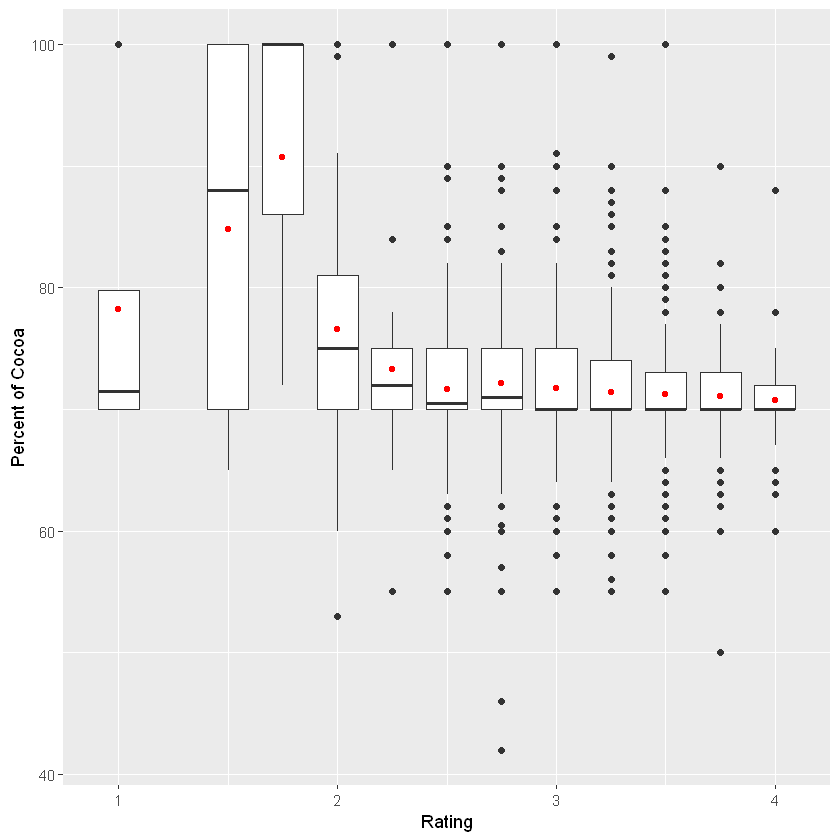

In [98]:
ggplot(data=df,aes(x=rating,y=cocoa_percent))+
           geom_boxplot(aes(group=rating))+
    stat_summary(fun.y="mean",color="red", shape=20,fill="red")+ylab("Percent of Cocoa")+xlab("Rating")

We will bin ratings in order to simplify the above boxplot

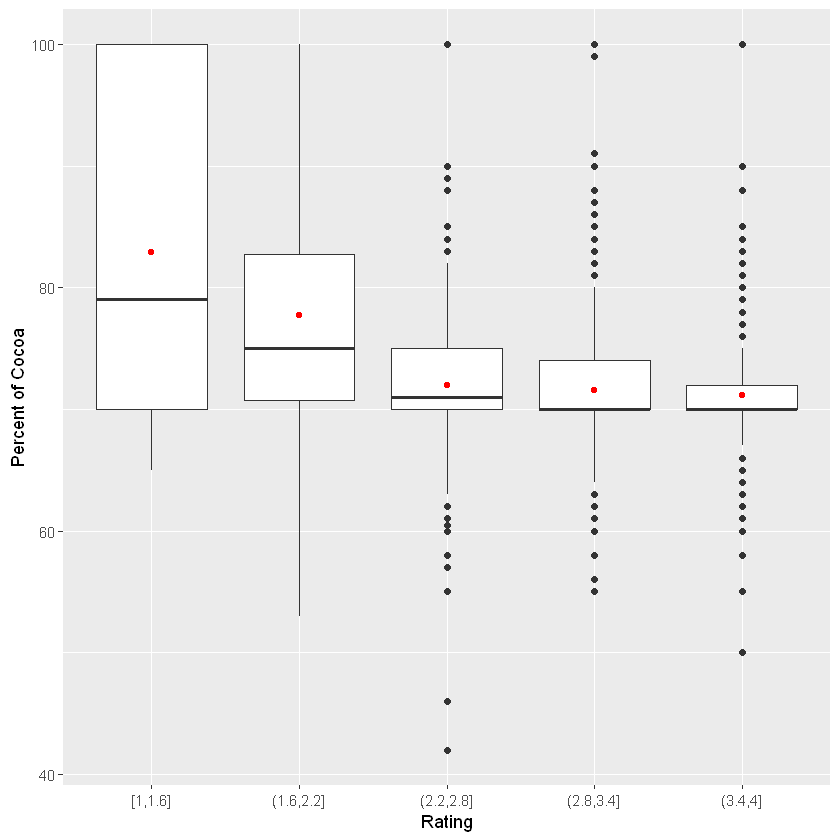

In [99]:
ggplot(data=df,aes(x=cut_interval(rating,5),y=cocoa_percent))+
    geom_boxplot(aes(group=cut_interval(rating,5)))+
    stat_summary(fun.y="mean",color="red", shape=20,fill="red")+ylab("Percent of Cocoa")+xlab("Rating")

Most high rated chocolate bars, as shown by the above boxplots and the respective average cocoa percentage, have a on average a cocoa percentage arround 70% . Lets create a dataframe based on the above beans

In [68]:
dfbins=df %>% mutate(bin=cut_interval(rating,5))

In [71]:
dfbins %>%na.omit %>%  group_by(bin) %>% 
select(bin,cocoa_percent,num_ingredients,rating) %>% 
summarize_all(mean)  

bin,cocoa_percent,num_ingredients,rating
<fct>,<dbl>,<dbl>,<dbl>
"[1,1.6]",75.17,4.000,1.417
"(1.6,2.2]",73.63,4.100,1.992
"(2.2,2.8]",71.86,3.092,2.656
"(2.8,3.4]",71.59,3.033,3.118
"(3.4,4]",71.13,2.984,3.635


At a first glane the percentage of cocoa contained in the chocolate bars, as well as the number of ingredients, tend to be lower in the highest rated dark chocolate bars

# Logistic Regression 
We will make a new variable named "top rated", it will take the value 1 for all chocolate bars that have a rating higher than 2.8


In [72]:
dfbins$toprated=ifelse(df$rating>2.8,1,0)

furthermore, we will create a new categorical variable "common_bean" which will equal to 1 if the bean's country of origin is amongst the most frequent.

In [73]:
frequent=df %>% count(bean_origin) %>% arrange(desc(n))  %>% 
head(5) %>% select(bean_origin) %>% 
t %>% as.vector

In [80]:
dfbins$freq=ifelse(dfbins$bean_origin %in% frequent,1,0)

We will also create one more categorical variable which will denote if the bar has a sweetener other than sugar or beet sugar.

In [81]:
dfbins$sweetener=ifelse(stringr::str_detect(dfbins$ingredients,fixed("S*")),1,0)

In [84]:
model=glm(toprated~cocoa_percent+as.factor(freq)+as.factor(sweetener),
          data=dfbins,family="binomial")

In [85]:
summary(model)


Call:
glm(formula = toprated ~ cocoa_percent + as.factor(freq) + as.factor(sweetener), 
    family = "binomial", data = dfbins)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.238   0.599   0.684   0.708   1.228  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)            4.04755    0.59330    6.82  9.0e-12 ***
cocoa_percent         -0.03876    0.00818   -4.74  2.1e-06 ***
as.factor(freq)1       0.02191    0.09675    0.23    0.821    
as.factor(sweetener)1 -0.67602    0.24595   -2.75    0.006 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2689.7  on 2529  degrees of freedom
Residual deviance: 2660.6  on 2526  degrees of freedom
AIC: 2669

Number of Fisher Scoring iterations: 4


Bases on the above results, whereas the country of origin is a common one or not, doesnt seem to have any effect.
The highest rated dark chocolate bars tend to not have a high cocoa percentage and dont use a sweetener other than sugar or beet sugar. The last finding can be explained by the effect of sugar on the human brain, which is not easily (if at all) replicated by artificial sweeteners.

In [92]:
#top 20 ratings
df %>% arrange(desc(rating)) %>% select(ingredients,cocoa_percent) %>% head(20)

,ingredients,cocoa_percent
,<chr>,<dbl>
1,"B,S,C,L",70
2,"B,S,C",63
3,"B,S,C,L",70
4,"B,S,C,L",70
5,"B,S,C,V",70
6,"B,S,C,V",70
7,"B,S,C,L",60
8,"B,S",70
9,"B,S",70


,ingredients,cocoa_percent
,<chr>,<dbl>
1,"B,S,C,V,L",73
2,"B,S,C,L",91
3,"B,S,L",70
4,"B,S*,C,Sa",65
5,"B,S,C",67
6,"B,S,C,V,L",85
7,"B,S,C",72
8,"B,S,C,V,L",72
9,"B,S,C,V,L",75


In [95]:
#bottom 20 values
df %>%  arrange(rating) %>% select(ingredients,cocoa_percent) %>% head(20)

,ingredients,cocoa_percent
,<chr>,<dbl>
1,,70
2,,100
3,,70
4,"B,S,C,V,L",73
5,,100
6,,100
7,"B,S,C,L",91
8,,100
9,"B,S,L",70


In [96]:
#bottom 20 ratings , with ommited values
df %>%na.omit %>%  arrange(rating) %>% select(ingredients,cocoa_percent) %>% head(20)


,ingredients,cocoa_percent
,<chr>,<dbl>
1,"B,S,C,V,L",73
2,"B,S,C,L",91
3,"B,S,L",70
4,"B,S*,C,Sa",65
5,"B,S,C",67
6,"B,S,C,V,L",85
7,"B,S,C",72
8,"B,S,C,V,L",72
9,"B,S,C,V,L",75
